In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

In [5]:
lambd=0.125
exp_rv=sts.expon(scale=1/lambd) # задаем случайную величину, распределенную по Парето
rv=exp_rv.rvs(size=1000) # сгенерируем 1000 значений

x = np.linspace(1,50, 1000)
pdf=exp_rv.pdf(x)

Text(0.5, 0, '$x$')

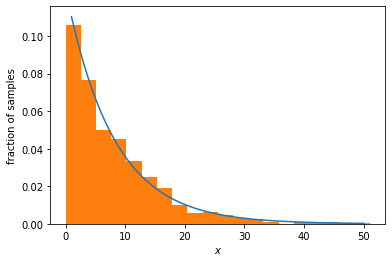

In [6]:
plt.plot(x,pdf) # теоретическая плотность распределения
plt.hist(rv,bins=20,density=True) # гистограмма выборки
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

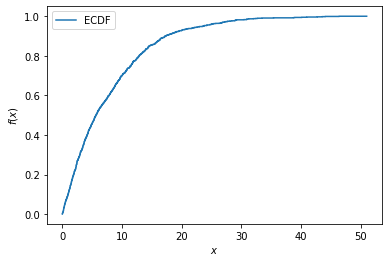

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(rv)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

In [14]:
def EX():
    return 1/lambd
def DX():
    return 1/lambd/lambd

(array([0.07944065, 0.18536151, 0.21184172, 0.38396313, 0.71496582,
        1.04596852, 1.350491  , 1.5226124 , 1.66825358, 1.37697121,
        1.31077067, 0.95328776, 0.92680755, 0.63552517, 0.41044334,
        0.18536151, 0.13240108, 0.10592086, 0.02648022, 0.01324011]),
 array([7.33649622, 7.4120243 , 7.48755239, 7.56308047, 7.63860856,
        7.71413665, 7.78966473, 7.86519282, 7.9407209 , 8.01624899,
        8.09177708, 8.16730516, 8.24283325, 8.31836133, 8.39388942,
        8.46941751, 8.54494559, 8.62047368, 8.69600176, 8.77152985,
        8.84705793]),
 <a list of 20 Patch objects>)

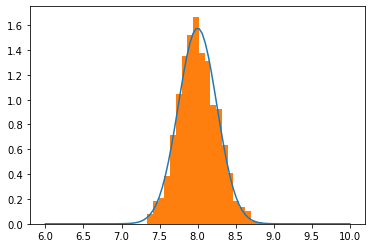

In [25]:
a1=np.zeros(1000)
for j in range(1000):
    rv = exp_rv.rvs(size=1000)
    for k in range(1000):
        a1[j]+=rv[k]
    a1[j]/=1000.
norm_rv=sts.norm(loc=EX(),scale=sqrt(DX()/1000))
x=np.linspace(6,10,100)
plt.plot(x,norm_rv.pdf(x))
plt.hist(a1,bins=20,density=True)